# Stress Prediction – LSTM, CNN, NCF & XGBoost Model
This notebook includes deep learning models and XGBoost for improved accuracy.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, LSTM, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from xgboost import XGBClassifier

df = pd.read_csv('dataset_prediksi_stres_1000_balanced.csv')
df.head()


2025-11-23 13:39:32.861920: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 13:39:32.968139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 13:39:35.210813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


,employee_id,department,workload,work_life_balance,team_conflict,management_support,work_environment,stress_level,label
0,EMP_SYN_1_0120,Operations,3,4,4,0,7,30,1
1,EMP_SYN_2_0127,IT,10,4,6,7,10,60,2
2,EMP_SYN_0_0209,Finance,10,10,3,8,0,20,0
3,EMP_SYN_0_0309,Marketing,0,3,5,5,6,17,0
4,EMP_SYN_2_0074,HR,4,7,3,4,2,49,2


## Preprocessing

In [2]:

def classify(x):
    if x <= 20: return 0
    elif x <= 40: return 1
    else: return 2

df['label'] = df['stress_level'].apply(classify)

features = ['workload','work_life_balance','team_conflict','management_support','work_environment']
X = df[features]
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## XGBoost Model

XGBoost Accuracy: 0.535
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        81
           1       0.48      0.49      0.48        63
           2       0.44      0.62      0.52        56

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.53       200
weighted avg       0.57      0.54      0.54       200



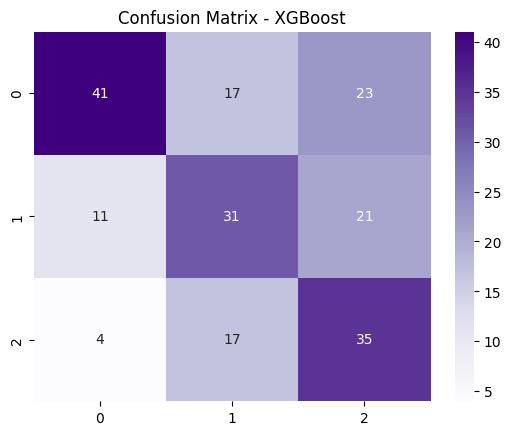

In [3]:

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.show()
